# **Known deep learning architecture.**

## ***1- Recurrent Neural Networks (RNNs)***
 Capable of capturing temporal dependencies within sequential data like vibration measurements. It employs the sequential information in the network, thus allowing an extraction of useful knowledge from the embedded structure in a data sequence. Consider:
### **1.1. Long Short-Term Memory (LSTM) networks.**
([tf.keras.layers.LSTM  |  TensorFlow v2.15.0.post1](http://))

([(beta) Dynamic Quantization on an LSTM Word Language Model — PyTorch Tutorials 2.2.1+cu121 documentation](http://))

  The fundamental concept of LSTM is forward propagation, it introduces a gating mechanism that controls the flow of information     within the network, allowing them to retain information for longer periods and learn complex temporal patterns.
  It is avoid exploding gradient problem; it uses different paths for long and short-term memories.
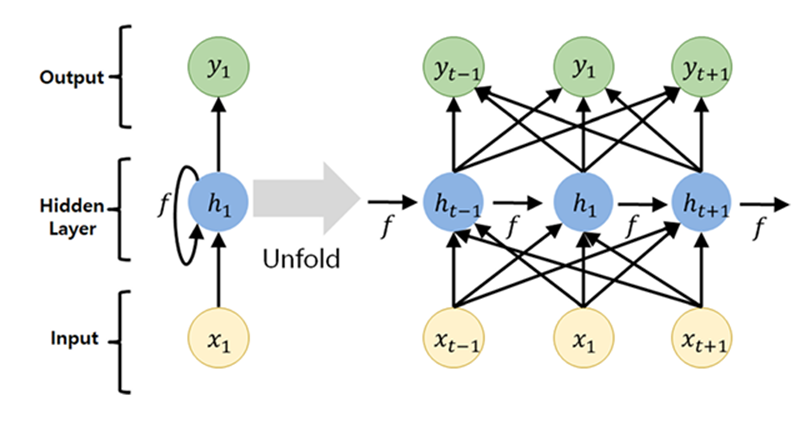
 
  The long-term memory can modified by multiplications “multiply by the output of the short-term” and then by addition without any   weights & biases, but the short-term memory are directly connected to weights, which represent the hidden state. 
  
  The first stage determines what percentage of the long-term memory is remembered.
  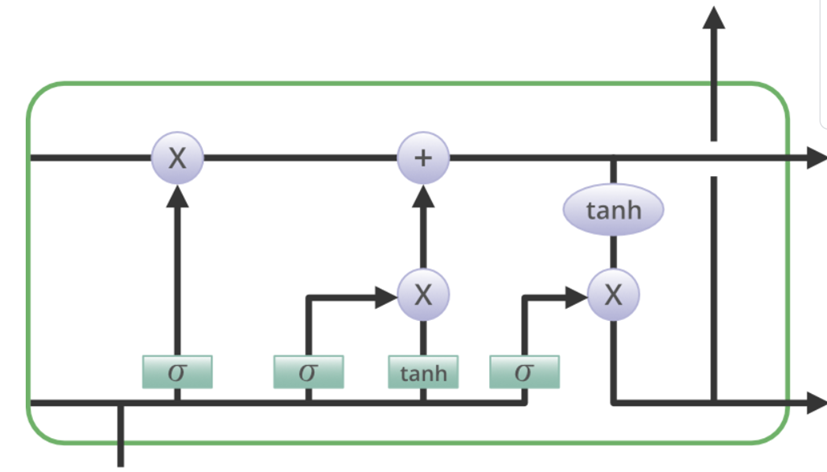
  

 **Theoretical Data Requirements**
 
  There were experiment done with this data:
  
  A total of 48 vibration datasets, each containing 9000 entries were chosen to demonstrate the experiment, with 12 datasets         corresponding to healthy bearings and labeled as ‘Healthy’, 12 datasets corresponding to inner race defect and labeled as 
  ‘Inner  Race Fault’, 12 datasets corresponding to outer race defect and labeled as ‘Outer Race Fault’, and the remaining 12       datasets corresponding to ball fault and labeled as ‘Ball Fault’. Then, to perform the LSTM network.
  
  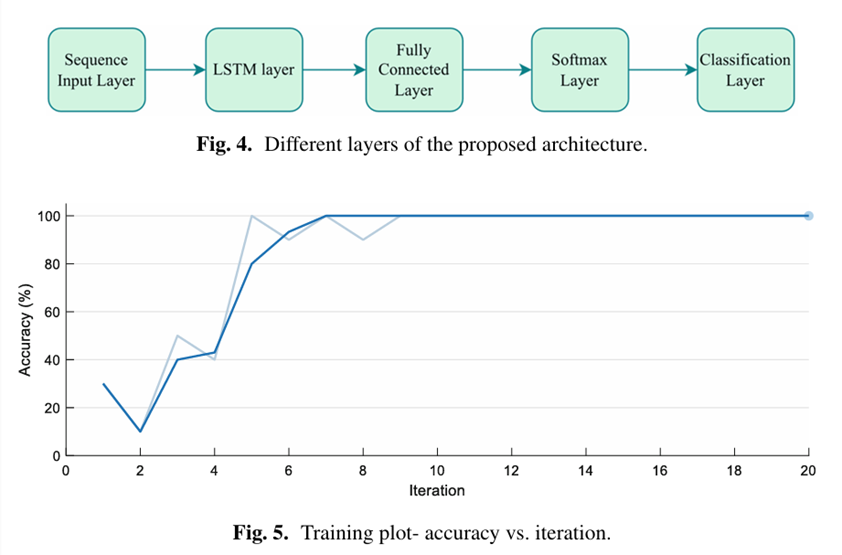
  
  

### **1.2. Gated Recurrent Units (GRUs)**
([tf.keras.layers.GRU  |  TensorFlow v2.15.0.post1](http://))

they use a gating mechanism to control information flow. However, GRUs have a simpler structure compared to LSTMs, making them slightly faster to train. While not as powerful as LSTMs for very long-term dependencies.
They have an update gate and a reset gate. The former is responsible for selecting what piece of knowledge is to be carried forward, whereas the latter lies in between two successive recurrent units and decides how much information needs to be forgotten. “ sequential data an important distinguishing feature between typical RNN and GRU is the ability to control the hidden information that solves gradient issues. This is possible in GRU through two gates. For instance, if the input is very important in a time step, the GRU will learn not to forget its information and keep it in a hidden status. Likewise, if the input is irrelevant and insignificant, GRU learns to ignore it.”
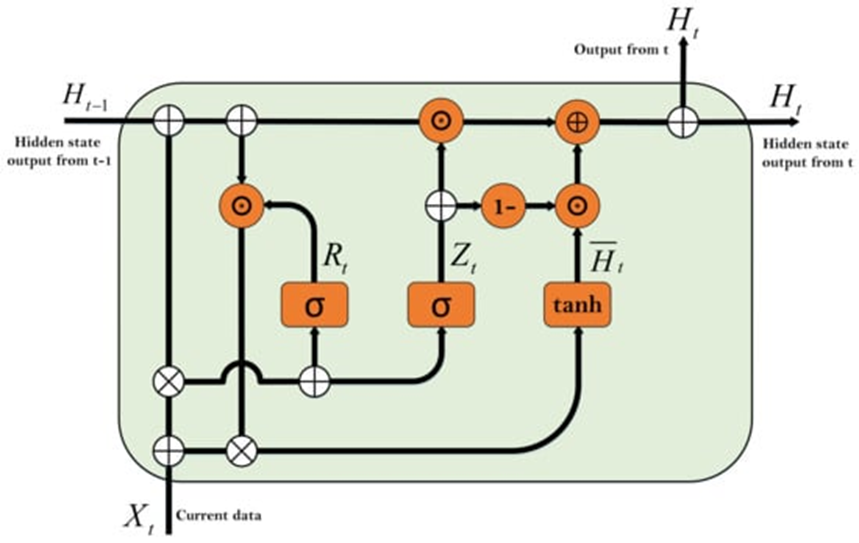



****LSTM vs. GRU:****

LSTMs and GRUs (LSTM: more powerful for long dependencies, GRU: faster training, simpler structure).



## ***2- Autoencoders.***
Useful for dimensionality reduction and anomaly detection in machinery data. But it’s Requiring a huge amount of data for training.
### **2.1. Variational Autoencoders (VAEs)**
VAE consists of both an encoder and a decoder and is trained to minimize the reconstruction error between the encoded-decoded data and the original data. First, the input is encoded as the distribution over the latent space and a point from the latent space is sampled from that distribution. Then, the sampled point is decoded and the reconstruction error is backpropagated.

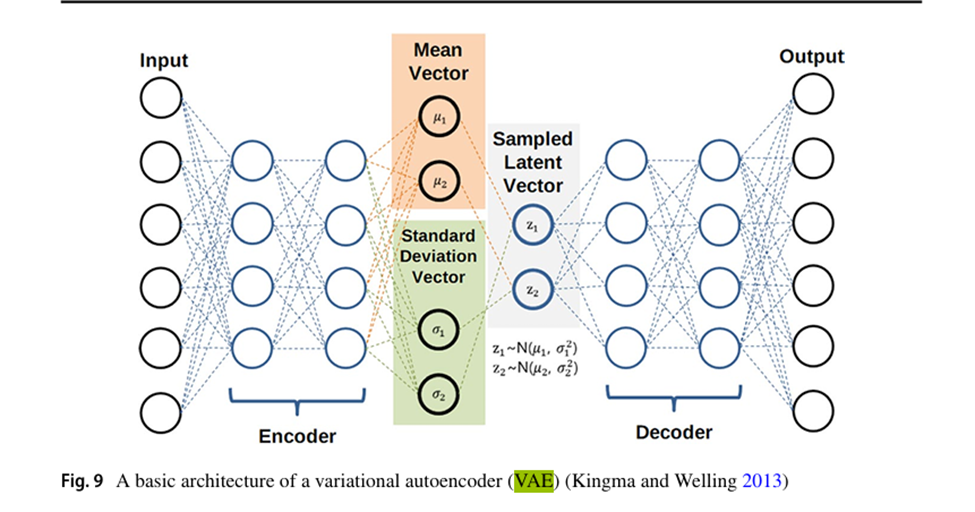

### **2.2. Denoising Autoencoders.**

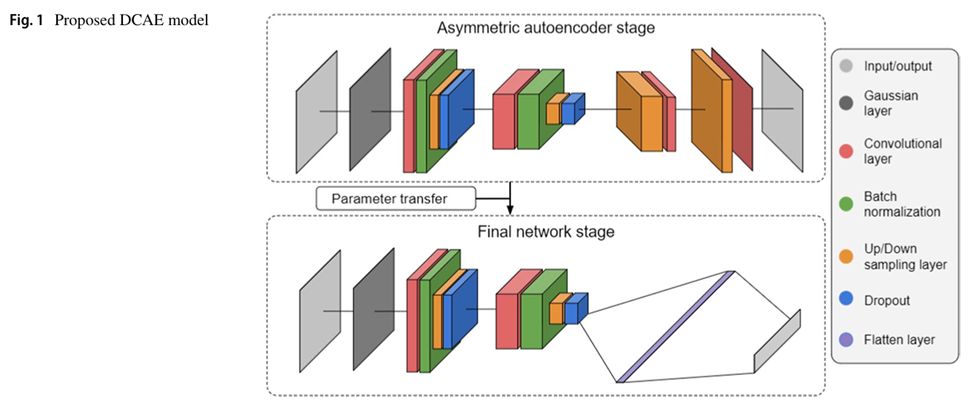

It puts some noise in the input layer to prevent unlearning during training.


## ***3- Transformers:***
Emerging architecture offering promising results in time-series classification tasks. Investigate:
### **3.1. Vision Transformer (ViT)***
**variants for time-series data**
The transformer network uses an acyclic network structure with parallel computation through an encoder–decoder and a self-attentive mechanism, drastically reducing the model training time.

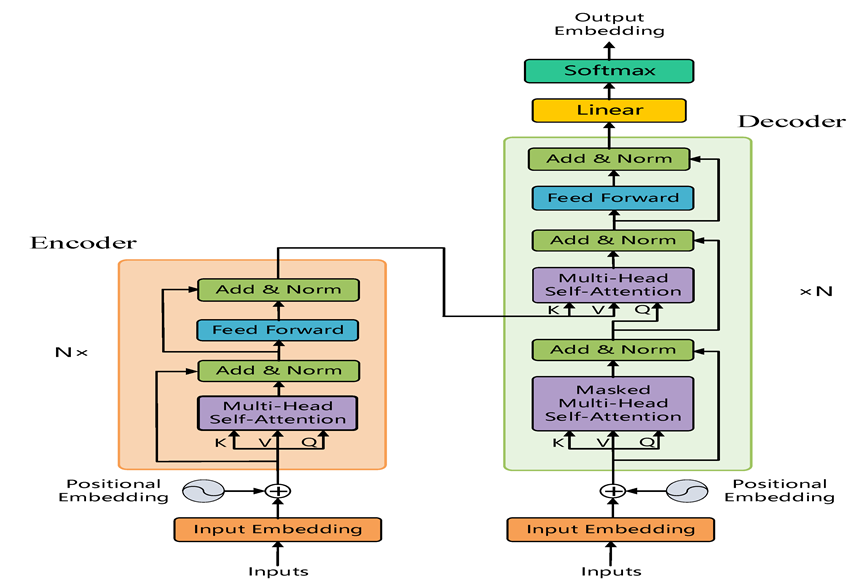


# **Data Augmentation Techniques for Small Datasets**

## ***A.Time-domain augmentation***

### **1- Dynamic time warping:**
Introduce slight distortions in the time axis of the vibration signals to simulate real-world variations, it manipulates the existing data to create variations within its temporal structure. This approach helps to expand the data diversity without needing to collect entirely new measurements.

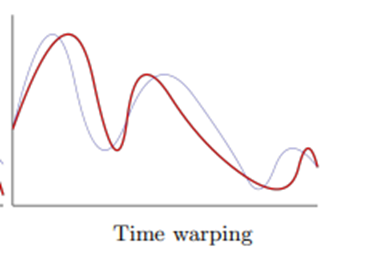



In [44]:
#Time Warping from TSAI
TSTimeWarp (magnitude=0.1, ord=6, **kwargs)
"""
magnitude: Specifies the magnitude of the time warping to be applied.
ord: Specifies the order of the warping function.
Higher-order warping functions can capture more complex deformations in the time series.
"""


test_eq(TSTimeWarp()(xb, split_idx=0).shape, xb.shape)  
"""checks if the shape of the output after applying time warping remains the same as the input data (xb). 
This ensures that the time warping operation does not change the shape of the data."""
test_ne(TSTimeWarp()(xb, split_idx=0), xb)
"""uses test_ne to check if the output after applying time warping is not equal to the original input data (xb). 
This verifies that the time warping operation is indeed altering the data in some way."""

NameError: name 'TSTimeWarp' is not defined


### **2- Jittering**
Jittering consists of adding noise to time series to perform data augmentation. This technique, in addition to being one of the simplest forms of DA, is one of the most popular in time series. It assumes that the data are noisy which, in many cases, i.e., when dealing with sensor data, is true.

Jittering tries to take advantage of the noise of the data and simulate it to generate new samples. Typically, **(Gaussian noise)** is added to each time step; the mean and standard deviation of this noise define the magnitude and shape of the deformation, so it is different in each application. The jittering process can be defined as:
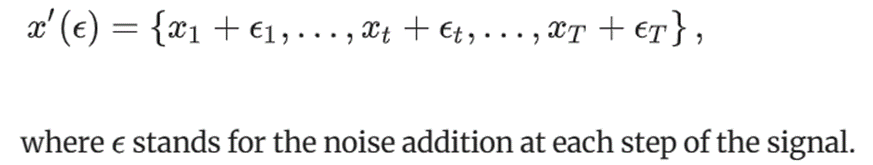

**(Masking noise)** An alternative way to apply random noise to data is to use the masking noise. A fraction αmask of the elements in x, which are randomly selected, is set 0.


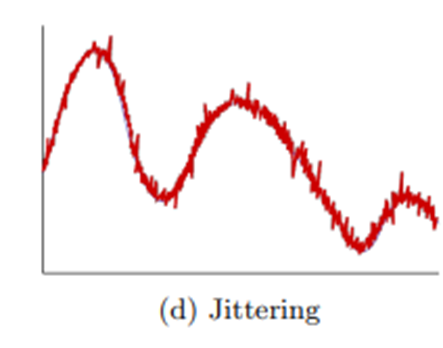



In [ ]:
# TSGaussianNoise From TSAI library
TSGaussianNoise (magnitude=0.5, additive=True, ex=None, **kwargs)

"""
magnitude: Specifies the magnitude of the Gaussian noise to be added.
additive: whether the noise should be added directly to the original data (additive) or multiplied with it (multiplicative).
ex: Additional parameters that are not specified in the provided code snippet.
Test Cases:

"""
test_eq(TSGaussianNoise(.1, additive=True)(xb, split_idx=0).shape, xb.shape) #Gaussian noise with a magnitude of 0.1 is added to the input data xb, and the shape of the output is checked to ensure it matches the shape of the input data.
test_eq(TSGaussianNoise(.1, additive=False)(xb, split_idx=0).shape, xb.shape) #Gaussian noise with the same magnitude is applied multiplicatively (i.e., not additive), and again, the shape of the output is checked against the input data's shape.



### **3- Channel permutation**
Changing the position of different channels in multidimensional data is a common practice. 

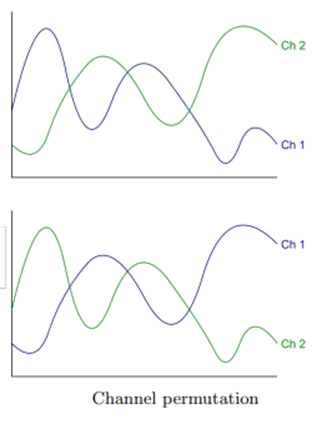


In [ ]:
import numpy as np

def channel_permutation(data, permutation): #rearranges the channels of a multi-dimensional array according to a specified order.
  """
  Args:
      data: A multidimensional array "3_D channels".
      permutation: A list representing the new order of channels.

  Returns:
      A new array with channels permuted according to the given order.
  """
  if len(permutation) != data.shape[-1]:
    raise ValueError("Permutation length must match the number of channels.")
    #Ensures that the permutation length matches the number of channels in the array
  return data[..., permutation]

# Example usage
data = np.random.rand(10, 10, 3)  #Create Sample 3-channel data to check
permutation = [2, 0, 1]  # Permute channels to new order 

permuted_data = channel_permutation(data.copy(), permutation)

print(f"Original data shape: {data.shape}")
print(f"Permuted data shape: {permuted_data.shape}")
print(data)
permuted_data



### **Signal Translation**
**“The highest accuracy”** Signal translation has been effectively used for the 1-dimensional vibration signal, both forward and backward translations are considered. The maximum translational length is denoted as αtran > 0. It is assumed that the artificially created training data are Naug times the original ones. We equally sample Naug values in the interval [−αtran, αtran] as the translational step for each signal variant, where the positive value means the forward direction and the negative one indicates the backward direction. In the sample-based augmentation, the data gap resulting from the translation is filled with zeros. No data gap exists in the dataset-based augmentation.

In [ ]:
import numpy as np

def signal_translation(signal, alpha_tran, n_aug):
    """
    Creates augmented signals by shifting the original signal along the time axis.

    Args:
        signal: A 1-dimensional numpy array representing the vibration signal "one channel".
        alpha_tran: The maximum allowed translation length (positive value).
        n_aug: The number of augmented signals to generate.

    Returns:
        A list containing the original signal and its translated variations.
    """
    augmented_signals = [signal.copy()]  # Start with a copy of the original signal

    for _ in range(n_aug):
        # To generate multiple augmented signals.
        translation = np.random.uniform(low=-alpha_tran, high=alpha_tran)
        translated_signal = np.roll(signal, int(translation))
        
        # Adjust the length of the shifted signal to match the original signal
        if translation > 0:
            # Shift to the right: fill the beginning of the signal with zeros
            translated_signal[:int(translation)] = 0
        elif translation < 0:
            # Shift to the left: fill the end of the signal with zeros
            translated_signal[int(translation):] = 0
            
        augmented_signals.append(translated_signal)

    return augmented_signals


# Example usage
signal = np.random.rand(100)  # Random sample vibration signal for one channel
alpha_tran = 5  # Maximum translation length
n_aug = 3  # Number of augmented signals to generate

augmented_signals = signal_translation(signal, alpha_tran, n_aug)

print(f"Original signal shape: {signal.shape}")
for i, sig in enumerate(augmented_signals):
    print(f"Augmented signal {i+1} shape: {sig.shape}")


augmented_signals

In [ ]:
translated_signal = np.roll(signal, int(translation))

### **Virtual sensors artificially augment the vibration data**

( [https://www.mdpi.com/2227-7390/9/18/2336#sec5-mathematics-09-02336](http://)
)


## ***Frequency-domain augmentation***
### **1- Frequency filtering**



### **2- Fourier transformations**




### **3- Noise injection.**
Add controlled amounts of noise to your data to enhance the model's robustness to noise in real-world measurements.
